# Clasificación de Imágenes con métodos clásicos y redes neuronales 

Mauricio Flores Pérez | A01639917
<br>
Tom Bruno Arc | A01562405
<br>
Alejandro Hermosillo García | A01634552




### Librerías 

In [ ]:
pip install scikeras 

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

import tensorflow as tf
import keras 
from keras.datasets import fashion_mnist
from keras.models import Sequential 
from keras.layers import Dense, Flatten
from keras.utils import np_utils

from scikeras.wrappers import KerasClassifier

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Fashion-MNIST

**Labels**
<br>
* 0 - T-shirt/Top
* 1 - Trouser
* 2 - Pullover
* 3 - Dress
* 4 - Coat
* 5 - Sandal
* 6 - Shirt
* 7 - Sneaker 
* 8 - Bag
* 9 - Ankle boot



In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step
Train: X = (60000, 28, 28)
Test: X = (10000, 28, 28)
--------------------------------------------------


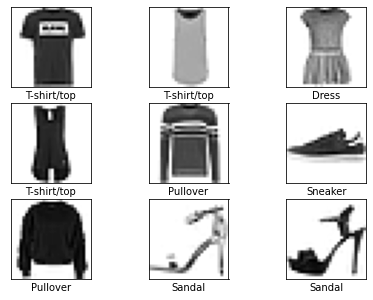

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('Train: X =', train_images.shape)
print('Test: X =', test_images.shape)
print('-'*50)


for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.gcf().set_size_inches(7, 5)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],  cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

In [ ]:
train_X = train_images/255.0
test_X = test_images/255.0

dummy_y = np_utils.to_categorical(train_labels)

##### Perceptrón multicapa

In [ ]:
clf = Sequential()
clf.add(Flatten(input_shape=(28, 28)))
clf.add(Dense(64, activation='relu'))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(64, activation='relu'))
clf.add(Dense(10, activation='softmax'))

clf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = clf.fit(train_X, dummy_y, epochs=10, batch_size=5, verbose=2)

Epoch 1/10
12000/12000 - 21s - loss: 0.5002 - accuracy: 0.8182 - 21s/epoch - 2ms/step
Epoch 2/10
12000/12000 - 20s - loss: 0.3894 - accuracy: 0.8574 - 20s/epoch - 2ms/step
Epoch 3/10
12000/12000 - 21s - loss: 0.3582 - accuracy: 0.8689 - 21s/epoch - 2ms/step
Epoch 4/10
12000/12000 - 20s - loss: 0.3380 - accuracy: 0.8770 - 20s/epoch - 2ms/step
Epoch 5/10
12000/12000 - 21s - loss: 0.3253 - accuracy: 0.8824 - 21s/epoch - 2ms/step
Epoch 6/10
12000/12000 - 22s - loss: 0.3165 - accuracy: 0.8844 - 22s/epoch - 2ms/step
Epoch 7/10
12000/12000 - 21s - loss: 0.3094 - accuracy: 0.8878 - 21s/epoch - 2ms/step
Epoch 8/10
12000/12000 - 21s - loss: 0.3025 - accuracy: 0.8903 - 21s/epoch - 2ms/step
Epoch 9/10
12000/12000 - 20s - loss: 0.2956 - accuracy: 0.8906 - 20s/epoch - 2ms/step
Epoch 10/10
12000/12000 - 20s - loss: 0.2903 - accuracy: 0.8936 - 20s/epoch - 2ms/step


In [ ]:
y_pred = np.argmax(clf.predict(test_X), axis=-1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print('Exactitud:', accuracy_score(test_labels, y_pred))
print('Sensibilidad:', recall_score(test_labels, y_pred, average=None))

Exactitud: 0.8752
Sensibilidad: [0.848 0.963 0.809 0.883 0.748 0.945 0.669 0.967 0.973 0.947]


##### SVM Lineal

In [ ]:
nsamples, nx, ny = train_X.shape
d2_train_X = train_X.reshape((nsamples,nx*ny))

nsamples_t, nx_t, ny_t = test_X.shape
d2_test_X = test_X.reshape((nsamples_t,nx_t*ny_t))

In [ ]:
SVM_1 = SVC(kernel='linear')
SVM_1.fit(d2_train_X, train_labels)

SVC(kernel='linear')

In [ ]:
y_pred1 = SVM_1.predict(d2_test_X)

In [ ]:
print('Exactitud:', accuracy_score(test_labels, y_pred1))
print('Sensibilidad:', recall_score(test_labels, y_pred1, average=None))

Exactitud: 0.8464
Sensibilidad: [0.815 0.962 0.769 0.842 0.774 0.936 0.562 0.934 0.925 0.945]


##### SVM Radial 

In [ ]:
SVM_2 = SVC(kernel='rbf')
SVM_2.fit(d2_train_X, train_labels)

SVC()

In [ ]:
y_pred2 = SVM_2.predict(d2_test_X)

In [ ]:
print('Exactitud:', accuracy_score(test_labels, y_pred2))
print('Sensibilidad:', recall_score(test_labels, y_pred2, average=None))

Exactitud: 0.8828
Sensibilidad: [0.857 0.962 0.816 0.89  0.815 0.951 0.654 0.955 0.977 0.951]
